## DATA VISUALIZATION IN PYTHON.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
# simple customization

sns.set_style('darkgrid')
sns.set_palette('husl')

### BAR CHART.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1273: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Text(0.5, 1.0, 'Bar chart of Total Bill Vs Smoking Habit')

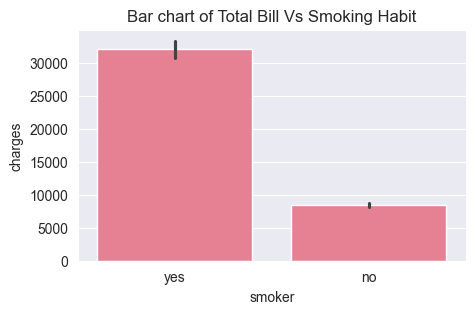

In [43]:
# seaborn

plt.figure(figsize=(5,3)) # adjust the size -- optional
sns.barplot(data = insurance_df, x='smoker', y='charges', estimator = 'mean') # to plot the actual chart -- mandatory
plt.title('Bar chart of Total Bill Vs Smoking Habit') # to set title -- optional

Text(0.5, 1.0, 'Bar chart of Total Bill Vs Smoking Habit')

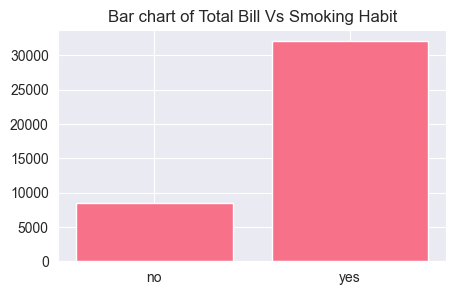

In [44]:
# matplotlib
temp_df = insurance_df[['smoker','charges']].groupby(by="smoker").mean()
plt.figure(figsize=(5,3)) # adjust the size -- optional
plt.bar(temp_df.index, temp_df['charges'])
plt.title('Bar chart of Total Bill Vs Smoking Habit') # to set title -- optional

In [26]:
temp_df.index

Index(['No', 'Yes'], dtype='object', name='smoker')

In [45]:
# plotly bar chart

px.histogram(data_frame=insurance_df, x = 'smoker', y = 'charges',
             title= 'Bar Chart of Smoker Vs Total Bill',
             height=300, width=500)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'smoker=%{x}<br>sum of charges=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object),
              'xaxis': 'x',
              'y': array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
                          29141.3603]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 300,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Bar Chart of Smoker Vs Total Bill'},
               'width': 500,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'smoker'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sum of charges'}}}
})

<Axes: xlabel='bmi', ylabel='charges'>

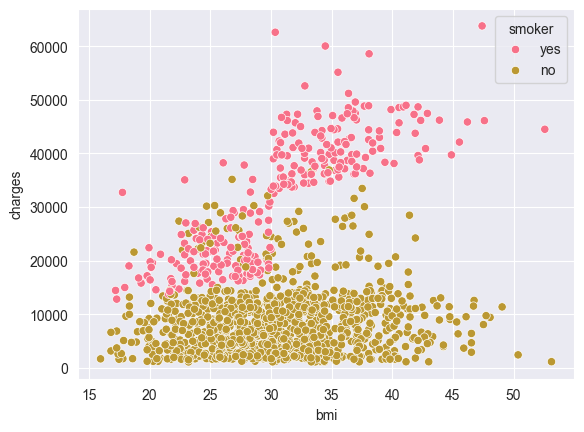

In [47]:
# scatter chart.


sns.scatterplot(data=insurance_df, x = 'bmi', y = 'charges',hue='smoker')

In [49]:
# plotly 


px.scatter(data_frame = insurance_df, x = 'bmi', y = 'charges',
           color = 'smoker')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'smoker=yes<br>bmi=%{x}<br>charges=%{y}<extra></extra>',
              'legendgroup': 'yes',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'yes',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([27.9  , 26.29 , 42.13 , ..., 26.695, 40.37 , 29.07 ]),
              'xaxis': 'x',
              'y': array([16884.924  , 27808.7251 , 39611.7577 , ..., 28101.33305, 43896.3763 ,
                          29141.3603 ]),
              'yaxis': 'y'},
             {'hovertemplate': 'smoker=no<br>bmi=%{x}<br>charges=%{y}<extra></extra>',
              'legendgroup': 'no',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'no',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([33.77 , 33.   , 22.705, ..., 31.92 , 36.85 , 25.8  ]),
              'xaxis': 'x',
              'y': array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,  1629.8335 ,
                           2007.945  ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'smoker'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'bmi'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'charges'}}}
})

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='smoker', ylabel='charges'>

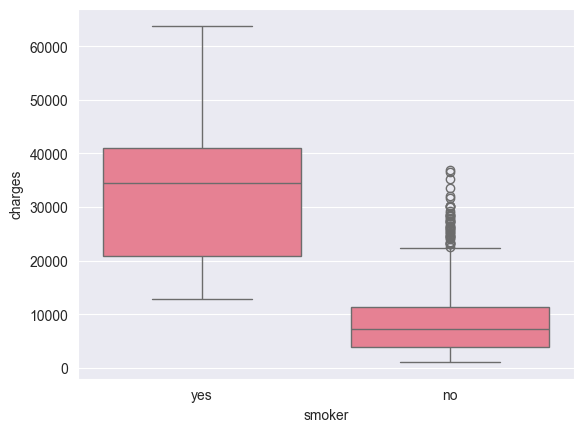

In [55]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(data=insurance_df, y = 'charges', x = 'smoker')

In [56]:
# Draw a nested boxplot to show bills by day and time
px.box(data_frame=insurance_df, y = 'charges', x = 'smoker')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'smoker=%{x}<br>charges=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
                          29141.3603]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'smoker'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'charges'}}}
})

Text(0.5, 1.0, 'PIE CHART OF REGION VS CHARGES')

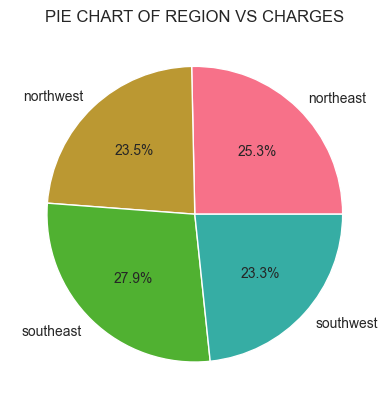

In [67]:
# pie chart
temp_df = insurance_df[['region','charges']].groupby(by="region").mean()
plt.pie(temp_df['charges'],labels= temp_df.index,autopct='%1.1f%%')
plt.title('PIE CHART OF REGION VS CHARGES')

In [70]:
px.pie(data_frame= temp_df, values = 'charges', labels=temp_df.index)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'charges=%{value}<extra></extra>',
              'legendgroup': '',
              'name': '',
              'showlegend': False,
              'type': 'pie',
              'values': array([13406.38451639, 12417.57537397, 14735.41143761, 12346.93737729])}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})